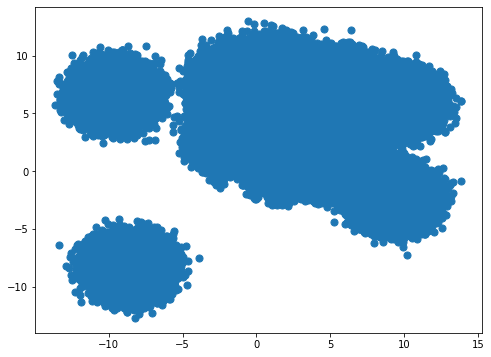

--- 2.1911988258361816 seconds ---


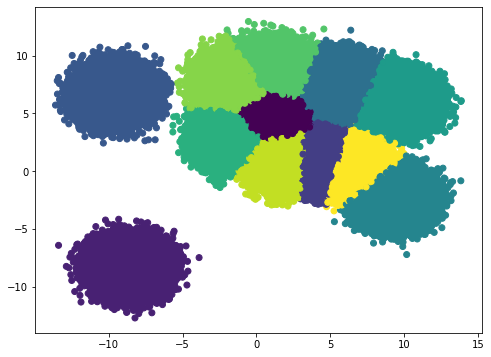

--- 13.343421220779419 seconds ---


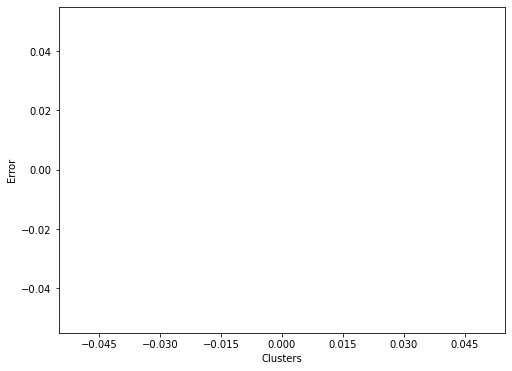

In [2]:
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import time

%matplotlib inline
plt.rcParams["figure.figsize"] = (8,6)

from h2o4gpu.solvers import KMeans
#from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from matplotlib.ticker import MaxNLocator
from matplotlib.pyplot import figure, show

start_time = time.time()
centers = 12 #np.random.randint(9, 10)
X, y_true = make_blobs(n_samples=800000, centers=centers, cluster_std=1.0, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()

guesses = []
guess_error_rates = []

guess = [12] #np.arange(1,15)

# make a k_means variable equal to KMeans with "guess" number of clusters (See above!)
# fit KMeans to the data "X"
for c in guess:
    k_means = KMeans(n_clusters=c)
    k_means.fit(X)
    clusters = k_means.predict(X)
    guesses.append(c)
    guess_error_rates.append(k_means.inertia_)

    
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.show()
ax = figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()


plt.plot(guesses, guess_error_rates)
plt.xlabel("Clusters")
plt.ylabel("Error")
plt.show()